Import Library

In [1]:
# import library
from collections import Counter
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
from scipy.stats import pearsonr

Import data

In [2]:
teams = pd.read_csv("/Users/adam/Desktop/Bayes/Class/Network_Analytics/SMM638/MTP/team_employee_affiliations.csv")
teams.head()

,team_id,empl_id
0,8,1
1,82,2
2,70,3
3,51,4
4,28,5


In [3]:
outcome = pd.read_csv("/Users/adam/Desktop/Bayes/Class/Network_Analytics/SMM638/MTP/project_outcomes.csv")
outcome

,team_id,project_tech_success,project_duration,project_novelty
0,8,0,89.504485,2.946377
1,82,1,81.995252,2.863422
2,70,1,90.027666,2.580469
3,51,1,90.099652,4.530003
4,28,1,87.894811,1.764565
...,...,...,...,...
96,62,1,87.247432,3.603582
97,74,1,82.284859,3.902010
98,59,1,80.613483,1.987187
99,78,1,91.033039,2.922677


In [4]:
ke = pd.read_csv("/Users/adam/Desktop/Bayes/Class/Network_Analytics/SMM638/MTP/knowledge_exchange_network.csv",
sep=",", header=None, names=["u", "v"])
ke

,u,v
0,0,1
1,0,542
2,0,2
3,0,541
4,0,3
...,...,...
3253,539,541
3254,539,542
3255,540,541
3256,540,542


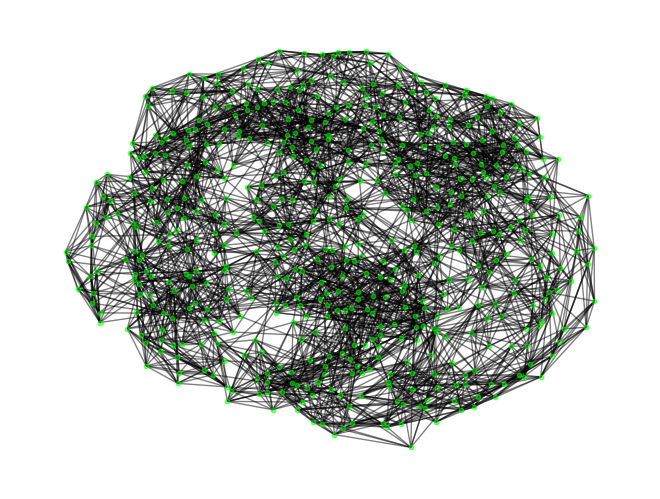

In [5]:
g = nx.from_pandas_edgelist(ke, source="u", target="v")
nx.is_directed(g)
nx.is_weighted(g)
nx.draw_kamada_kawai(g, node_size=10, node_color="lime", alpha=0.5)

Density Matrics

In [6]:
# get node degree
g_node_degree = nx.degree(g)
g_degree_dict = dict(g_node_degree)
g_degree_dict?

Type:        dict
String form: {0: 12, 1: 13, 542: 12, 2: 12, 541: 12, 3: 12, 540: 12, 4: 12, 539: 12, 538: 12, 6: 11, 537: 12,  <...> 17: 12, 520: 11, 521: 12, 522: 11, 527: 11, 523: 12, 525: 12, 529: 12, 530: 12, 534: 12, 535: 11}
Length:      543
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)

In [7]:
# clustering coefficent
g_clustering = nx.clustering(g)
g_clustering?

Type:        dict
String form: {0: 0.5606060606060606, 1: 0.48717948717948717, 542: 0.6515151515151515, 2: 0.5606060606060606, 5 <...> 9: 0.6060606060606061, 530: 0.6060606060606061, 534: 0.6515151515151515, 535: 0.6909090909090909}
Length:      543
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)

In [8]:
# constraint index
g_constraint = nx.constraint(g)
g_constraint?

Type:        dict
String form: {0: 0.19389080261931366, 1: 0.17349513127847221, 542: 0.21229408649280443, 2: 0.1930316898174561, <...>  0.20546082280868327, 530: 0.2047649414074135, 534: 0.2138854820889973, 535: 0.22234496272957813}
Length:      543
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)

In [9]:
# betweenness centrality
g_betweenness_centrality = nx.betweenness_centrality(g)
g_betweenness_centrality?

Type:        dict
String form: {0: 0.006873410178723041, 1: 0.014590012347764195, 542: 0.0016251400415492167, 2: 0.0071822614622 <...> 388707701335, 530: 0.0021655921824539075, 534: 0.0016610087258536643, 535: 0.0008753366864601898}
Length:      543
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)

In [10]:
# get average degree
g_k = np.mean([d for n, d in g_node_degree])
g_k

12.0

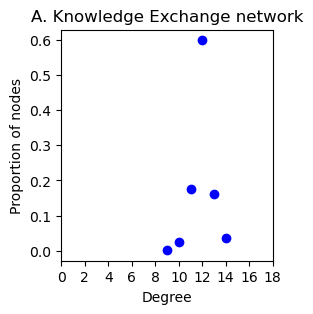

In [11]:
# dgree distribution
# Knowledge Exchange network
## get node degree
g_node_degree = nx.degree(g)
## get degree distribution
g_dd = Counter([d for n, d in g_node_degree])
# visualize degree distribution
fig = plt.figure(figsize=(6, 3))
ax0 = fig.add_subplot(121)
props = [_/len(g.nodes()) for _ in g_dd.values()]
ax0.scatter(g_dd.keys(), props, color='blue')
ax0.set_xlabel('Degree')
ax0.set_ylabel('Proportion of nodes')
ax0.set_title('A. Knowledge Exchange network')
ax0.set_xticks(np.arange(0, 20, 2))
# show plot
plt.show()

<BarContainer object of 71 artists>

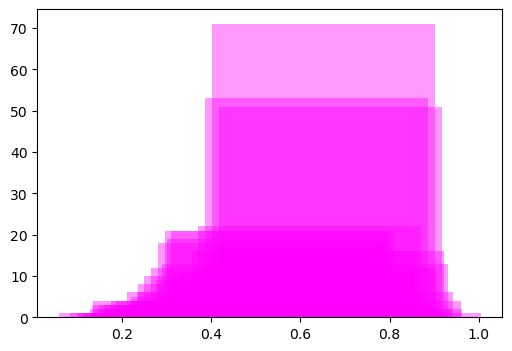

In [12]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
g_clustering_dist = Counter(g_clustering.values())
ax.bar(
    g_clustering_dist.keys(),
    g_clustering_dist.values(),
    color = "magenta",
    label = "Info Exchange network",
    width = 0.5,
    alpha = 0.4
)

Merge Dictionarys with teams dataframe

In [13]:
teams['node_degree'] = teams['empl_id'].map(g_degree_dict)
teams['clustering_coefficient'] = teams['empl_id'].map(g_clustering)
teams['constraint_index'] = teams['empl_id'].map(g_constraint)
teams['betweenness_centrality'] = teams['empl_id'].map(g_betweenness_centrality)

# delete 543
teams = teams.drop(index=542).reset_index(drop=True)
teams

,team_id,empl_id,node_degree,clustering_coefficient,constraint_index,betweenness_centrality
0,8,1,13.0,0.487179,0.173495,0.014590
1,82,2,12.0,0.560606,0.193032,0.007182
2,70,3,12.0,0.484848,0.176660,0.017848
3,51,4,12.0,0.621212,0.206694,0.001803
4,28,5,12.0,0.560606,0.194104,0.008077
...,...,...,...,...,...,...
537,28,538,12.0,0.681818,0.218818,0.001631
538,68,539,12.0,0.681818,0.220154,0.001440
539,51,540,12.0,0.606061,0.204477,0.008804
540,75,541,12.0,0.666667,0.216787,0.001763


In [14]:
# use mean groupby
team_summary = teams.groupby('team_id').agg(
    avg_degree = ('node_degree', 'mean'),
    avg_clustering = ('clustering_coefficient', 'mean'),
    avg_constraint = ('constraint_index', 'mean'),
    avg_centrality = ('betweenness_centrality', 'mean'),
    count=('empl_id', 'count')  # number of team members
).reset_index()
team_summary

,team_id,avg_degree,avg_clustering,avg_constraint,avg_centrality,count
0,1,12.200000,0.543776,0.189966,0.010853,5
1,2,12.571429,0.531112,0.185680,0.008873,7
2,3,12.000000,0.519481,0.185298,0.010507,7
3,4,11.500000,0.602525,0.204481,0.003964,6
4,5,12.125000,0.594260,0.200990,0.005134,8
...,...,...,...,...,...,...
96,97,12.500000,0.559441,0.190590,0.008178,4
97,98,12.090909,0.590033,0.201239,0.005840,11
98,99,12.250000,0.632867,0.207942,0.003169,4
99,100,12.000000,0.603030,0.207263,0.004612,3


In [15]:
outcome_merged = pd.merge(outcome, team_summary, on='team_id', how='outer')
outcome_merged

,team_id,project_tech_success,project_duration,project_novelty,avg_degree,avg_clustering,avg_constraint,avg_centrality,count
0,1,0,91.059679,3.528110,12.200000,0.543776,0.189966,0.010853,5
1,2,1,92.116045,3.057953,12.571429,0.531112,0.185680,0.008873,7
2,3,1,97.440085,3.746968,12.000000,0.519481,0.185298,0.010507,7
3,4,1,88.752949,2.685005,11.500000,0.602525,0.204481,0.003964,6
4,5,1,84.906637,3.026805,12.125000,0.594260,0.200990,0.005134,8
...,...,...,...,...,...,...,...,...,...
96,97,0,85.202386,3.609955,12.500000,0.559441,0.190590,0.008178,4
97,98,1,87.799423,3.266782,12.090909,0.590033,0.201239,0.005840,11
98,99,1,82.887810,2.790244,12.250000,0.632867,0.207942,0.003169,4
99,100,1,79.673860,2.720417,12.000000,0.603030,0.207263,0.004612,3


Statistical Analyses

Correlation

In [16]:
selected_columns = ["project_duration", "project_novelty", "avg_degree", "avg_clustering", "avg_constraint", "avg_centrality"]
correlation_matrix = outcome_merged[selected_columns].corr(method='spearman')
correlation_matrix

,project_duration,project_novelty,avg_degree,avg_clustering,avg_constraint,avg_centrality
project_duration,1.000000,0.242772,0.182510,-0.609823,-0.591089,0.598602
project_novelty,0.242772,1.000000,0.234151,-0.418698,-0.390681,0.411485
avg_degree,0.182510,0.234151,1.000000,-0.334109,-0.461809,0.459391
avg_clustering,-0.609823,-0.418698,-0.334109,1.000000,0.973628,-0.921432
avg_constraint,-0.591089,-0.390681,-0.461809,0.973628,1.000000,-0.929272
avg_centrality,0.598602,0.411485,0.459391,-0.921432,-0.929272,1.000000


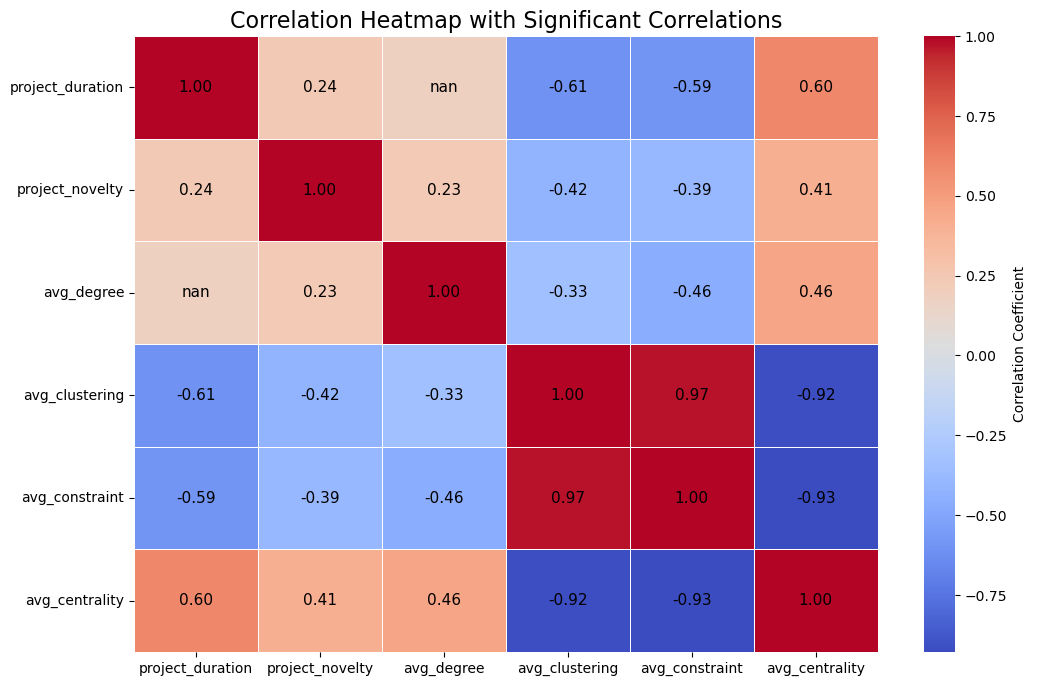

In [17]:
# set significance level
significance_level = 0.01

# calculate the correlation coefficient matrix and p-value matrix
selected_columns = ["project_duration", "project_novelty", "avg_degree", "avg_clustering", "avg_constraint", "avg_centrality"]
correlation_matrix = outcome_merged[selected_columns].corr(method='spearman')
p_value_matrix = pd.DataFrame(np.ones((outcome_merged.shape[1], outcome_merged.shape[1])), columns=outcome_merged.columns, index=outcome_merged.columns)

# calculate the p-value between each pair of variables
for col1 in outcome_merged.columns:
    for col2 in outcome_merged.columns:
        if col1 != col2:
            _, p_value = pearsonr(outcome_merged[col1], outcome_merged[col2])
            p_value_matrix.loc[col1, col2] = p_value
        else:
            p_value_matrix.loc[col1, col2] = 0  # set the p-value for self-comparison to 0
            
# create a matrix displaying significant correlation values
annot_matrix = correlation_matrix.copy()

# set non-significant correlations to NaN
annot_matrix[p_value_matrix >= significance_level] = np.nan

# plot the correlation matrix, displaying only significant correlation values
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=annot_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5, 
            annot_kws={"size": 11, "color": "black"},
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap with Significant Correlations", fontsize=16)
plt.show()


T test

Devided into success group and unsuccess group

In [18]:
outcome_success = outcome_merged[outcome_merged["project_tech_success"] == 1].reset_index(drop=True)
outcome_unsuccess = outcome_merged[outcome_merged["project_tech_success"] == 0].reset_index(drop=True)

In [30]:
columns_to_test = ["project_duration", "project_novelty", "avg_degree", "avg_clustering", "avg_constraint", "avg_centrality", "count"]
significance_level = 0.05  # significance level

# store test results
results = {}

for variable in columns_to_test:
    A = outcome_success[variable]
    B = outcome_unsuccess[variable]
    
    # perform a t-test
    t_stat, p_value = ttest_ind(A, B)
    
    # determine significance
    if p_value < significance_level:
        result = "Significant"
    else:
        result = "Not Significant"
    
    # save the results
    results[variable] = {
        "t_stat": t_stat,
        "p_value": p_value,
        "sig_result": result
    }

# print the test results for each colum
for variable, res in results.items():
    print(f"Results for {variable}:")
    print("t-statistic:", res["t_stat"])
    print("p-value:", res["p_value"])
    print(res["sig_result"])
    print("-" * 30)


Results for project_duration:
t-statistic: -3.2674614926464707
p-value: 0.0014921403543919623
Significant
------------------------------
Results for project_novelty:
t-statistic: -1.1039857370535018
p-value: 0.272275451429617
Not Significant
------------------------------
Results for avg_degree:
t-statistic: -1.7124164709782859
p-value: 0.08995052726911025
Not Significant
------------------------------
Results for avg_clustering:
t-statistic: 4.499579930592511
p-value: 1.8579489404152844e-05
Significant
------------------------------
Results for avg_constraint:
t-statistic: 4.6238045684011055
p-value: 1.1397918404483473e-05
Significant
------------------------------
Results for avg_centrality:
t-statistic: -5.1590957391601115
p-value: 1.2775783996435605e-06
Significant
------------------------------
Results for count:
t-statistic: 0.04552559599465128
p-value: 0.9637800784473092
Not Significant
------------------------------


In [29]:
columns_to_calculate = ["project_duration", "project_novelty", "avg_degree", "avg_clustering", "avg_constraint", "avg_centrality", "count"]

# dictionary to store the results
mean_results = {}

for column in columns_to_calculate:
    mean_success = outcome_success[column].mean()
    mean_unsuccess = outcome_unsuccess[column].mean()
    
    # store the results in a dictionary
    mean_results[column] = {
        "outcome_success_mean": mean_success,
        "outcome_unsuccess_mean": mean_unsuccess
    }

# print the results
for column, means in mean_results.items():
    print(f"{column} 欄位的平均值:")
    print("  outcome_success:", means["outcome_success_mean"])
    print("  outcome_unsuccess:", means["outcome_unsuccess_mean"])
    print("-" * 30)


project_duration 欄位的平均值:
  outcome_success: 86.57839417696589
  outcome_unsuccess: 89.74107929584143
------------------------------
project_novelty 欄位的平均值:
  outcome_success: 2.9852417548638472
  outcome_unsuccess: 3.1569345379963845
------------------------------
avg_degree 欄位的平均值:
  outcome_success: 11.946586284086283
  outcome_unsuccess: 12.096739130434784
------------------------------
avg_clustering 欄位的平均值:
  outcome_success: 0.5942142465211062
  outcome_unsuccess: 0.5551408592557662
------------------------------
avg_constraint 欄位的平均值:
  outcome_success: 0.20184360233381018
  outcome_unsuccess: 0.19253866153903781
------------------------------
avg_centrality 欄位的平均值:
  outcome_success: 0.004930813701322298
  outcome_unsuccess: 0.007772471229631714
------------------------------
count 欄位的平均值:
  outcome_success: 5.371794871794871
  outcome_unsuccess: 5.3478260869565215
------------------------------


Linear Regression

In [31]:
# linear regression
X = outcome_merged[["avg_clustering"]]
y = outcome_merged["project_novelty"]
# add a constant term (intercept)
X = sm.add_constant(X)
# Build and train an OLS model
model = sm.OLS(y, X)
results = model.fit()
# display the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        project_novelty   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     20.29
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           1.82e-05
Time:                        01:02:37   Log-Likelihood:                -90.839
No. Observations:                 101   AIC:                             185.7
Df Residuals:                      99   BIC:                             190.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.9879      0.882      7.

Linear Regression Plot

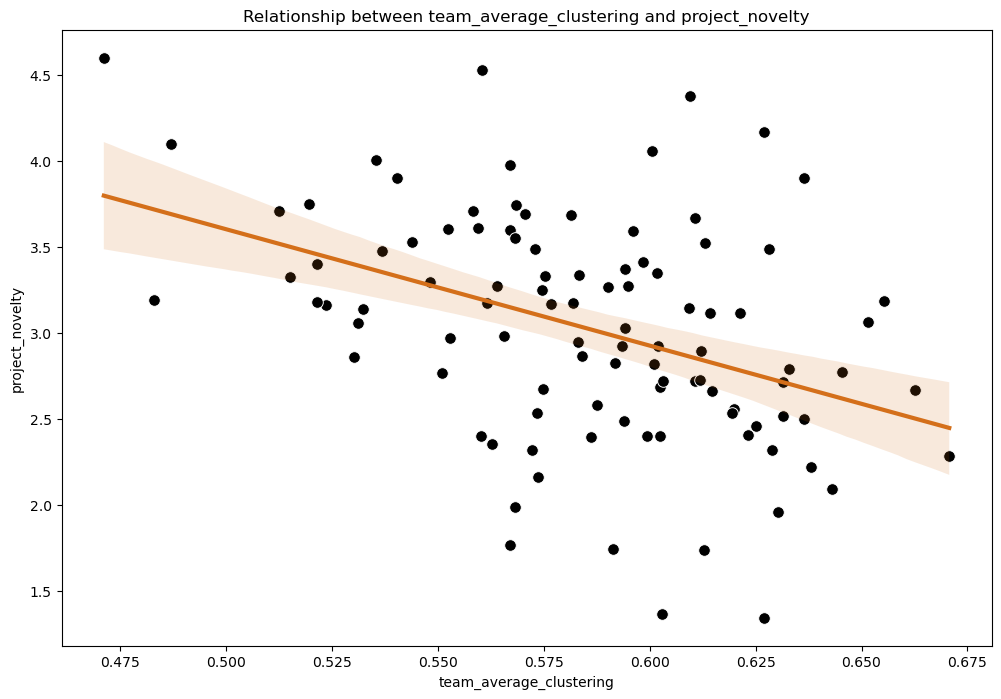

In [32]:
# scatterplot regression line
plt.figure(figsize=(12, 8))
sns.scatterplot(data=outcome_merged, x='avg_clustering', y='project_novelty', color='black', s=70)
sns.regplot(data=outcome_merged, x='avg_clustering', y='project_novelty', scatter=False, color='#D46F1A', line_kws={"linewidth": 3})

# title and label
plt.title("Relationship between team_average_clustering and project_novelty")
plt.xlabel("team_average_clustering")
plt.ylabel("project_novelty")
#plt.legend(title='Success')
plt.show()